In [1]:
### Load image dataset

import imageio
import numpy as np
import h5py
import matplotlib.pyplot as plt
import PIL
# import scipy.misc

f = h5py.File('../training_dataset.hdf5', 'r')
# console: list(f.keys())
# out: ['test_img', 'test_labels', 'train_img', 'train_labels']
train_x_img = f['train_img']
train_y_labels = f['train_labels']
test_x_img = f['test_img']
test_y_labels = f['test_labels']
# data = np.array(dset[:,:,:])

# imageio.imwrite('test2.jpg', dset[50]) # if you want to save a blurry image

In [2]:
import time
import scipy
from PIL import Image
from scipy import ndimage

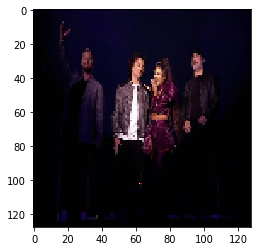

In [3]:
display_index = 80

plt.imshow(train_x_img[display_index]) # change index to whatever pic to see

In [4]:
# troubleshooting, get rid of later

# below 2 lines actually needed - ONLY RUN ONCE
train_y_labels = np.expand_dims(train_y_labels, axis = 0)
test_y_labels = np.expand_dims(test_y_labels, axis = 0)

m_train = train_x_img.shape[0]
num_px = train_x_img.shape[1]
m_test = test_x_img.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_img.shape))
print ("train_y shape: " + str(train_y_labels.shape))
print ("test_x_orig shape: " + str(test_x_img.shape))
print ("test_y shape: " + str(test_y_labels.shape))

Number of training examples: 844
Number of testing examples: 211
Each image is of size: (128, 128, 3)
train_x_orig shape: (844, 128, 128, 3)
train_y shape: (1, 844)
test_x_orig shape: (211, 128, 128, 3)
test_y shape: (1, 211)


In [5]:
# Reshape the training and test examples 
train_x_flatten = train_x_img.reshape(train_x_img.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_img.reshape(test_x_img.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


AttributeError: 'Dataset' object has no attribute 'reshape'